# 파이토치(PyTorch) 기초문법

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치 모듈 구조

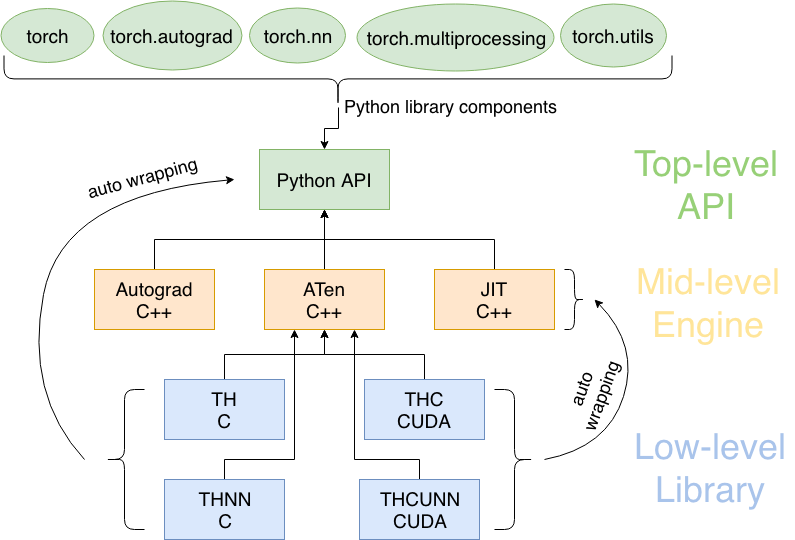

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. <br> https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

<small>출처: 이수안컴퓨터연구소 '파이토치 PyTorch' <br>
 https://youtube.com/playlist?list=PL7ZVZgsnLwEEIC4-KQIchiPda_EjxX61r&si=e6Spnwsrsy5D29Go</small>

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [1]:
import torch

torch.__version__

'2.3.1+cu121'

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

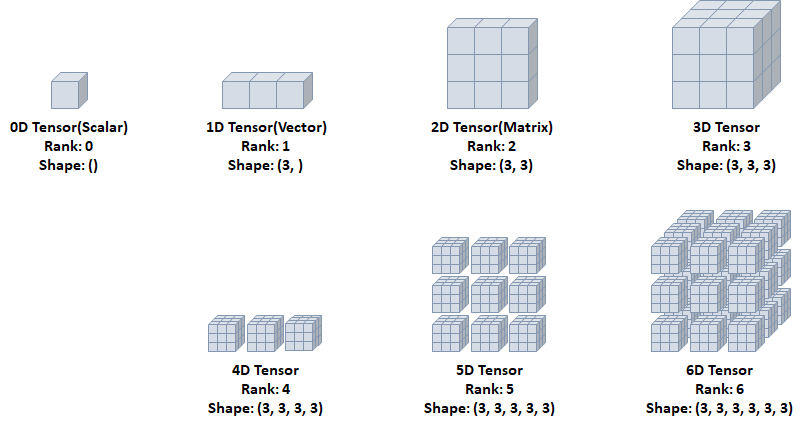

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [ ]:
# empty()
# 4x2 matrix tensor

x = torch.empty(4,2)
x # random값이 들어있다.

tensor([[9.8027e+24, 4.5457e-41],
        [9.8027e+24, 4.5457e-41],
        [1.8807e+31, 2.8665e+32],
        [4.5437e+30, 1.1819e+22]])

무작위로 초기화된 텐서

In [ ]:
# randn()
# 4x2 matrix tensor

x = torch.randn(4,2)
x

tensor([[-1.7357,  0.6654],
        [ 2.8290, -0.1316],
        [ 0.3734, -0.2181],
        [-1.0734,  1.8984]])

데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
# zeros() & dtype
# long = 정수형

x = torch.zeros(4,2, dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

사용자가 입력한 값으로 텐서 초기화

In [ ]:
# tensor()

x = torch.tensor([3, 2.3])
x

tensor([3.0000, 2.3000])

2 x 4 크기, double 타입, 1로 채워진 텐서

In [ ]:
# new_ones()

x = x.new_ones(2,4, dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [ ]:
# randn_like()

x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-0.9343,  1.6326,  0.7506,  0.3457],
        [-1.8284, -0.7747, -1.3299, -0.7162]])

텐서의 크기 계산

In [ ]:
# .size()

x.size()

torch.Size([2, 4])

### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [ ]:
# FloatTensor()

ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype) # default = float32

tensor([1., 2., 3.])
torch.float32


In [ ]:
# int

print(ft.short()) # 짧은 메모리의 정수; 16bits
print(ft.int()) # 중간 메모리의 정수; 32bits
print(ft.long()) # 긴 메모리의 정수; 64bits

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
# IntTensor()

it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
# float

print(it.float()) # 32bits
print(it.double()) # 64bits
print(it.half()) # 16bits

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [ ]:
x  = torch.randn(1)
print(x) # tensor로 관찰
print(x.item()) # 실제 값; 더 길게 확인됨
print(x.dtype) # 자료형; 실수

tensor([1.7530])
1.7529603242874146
torch.float32


In [ ]:
# torch.cuda.is_available() -> True이면, 'cuda'로 device가 계산됨
# torch.cuda.is_available() -> False이면, 'cpu'로 device가 계산됨

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# 아래 두개를 조건문으로 나눈 것

device(type='cuda')

In [ ]:
torch.device('cuda')

device(type='cuda')

In [ ]:
torch.device('cpu')

device(type='cpu')

In [ ]:
# x라는 스칼라 tensor와 크기가 같은 1값만 있는 tensor를, cuda를 이용하도록 선언

y = torch.ones_like(x, device=device)
y

tensor([1.], device='cuda:0')

In [ ]:
# 기존에 그냥 cpu로 정의된 tensor를 cuda로 바꿔서 선언

x = x.to(device)
x

tensor([1.7530], device='cuda:0')

In [ ]:
z = x + y
print(z) # cuda로 정의된 tensor끼리 합
print(z.to('cpu', torch.double)) # cpu로 다시 재정의

tensor([2.7530], device='cuda:0')
tensor([2.7530], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [ ]:
t0 = torch.tensor(0)
print(t0.ndim) # dim = 0; scaler
print(t0.shape) # size = []; scaler
print(t0) # 값도 tensor 0

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

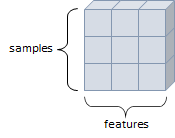

In [ ]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

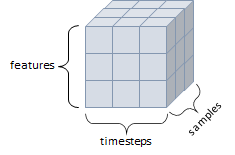

In [ ]:
t3 = torch.tensor([
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]
                   ])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

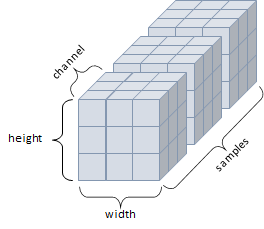

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
import math

a = torch.randn(1,2) * 2 - 1
a

tensor([[ 0.2426, -0.4716]])

In [ ]:
print(torch.abs(a))
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5)) # 최대값과 최솟값이 이 범위를 넘으면, 이 범위값으로 만든다.

tensor([[0.2426, 0.4716]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.2426, -0.4716]])


In [ ]:
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,3])))

tensor(-0.4716)
tensor(0.2426)
tensor(-0.1145)
tensor(0.5050)
tensor(-0.1144)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [ ]:
x = torch.randn(2,2)
print(x, '\n')

print(x.max(dim=0)) # 같은 열기준, 행끼리 비교
print(x.max(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[-2.2941,  0.5828],
        [ 0.5788,  1.3425]]) 

torch.return_types.max(
values=tensor([0.5788, 1.3425]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.5828, 1.3425]),
indices=tensor([1, 1]))


In [ ]:
x = torch.randn(2,2)
print(x, '\n')

print(x.min(dim=0)) # 같은 열기준, 행끼리 비교
print(x.min(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[ 0.5608,  0.7136],
        [ 0.0138, -0.9107]]) 

torch.return_types.min(
values=tensor([ 0.0138, -0.9107]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([ 0.5608, -0.9107]),
indices=tensor([0, 1]))


In [ ]:
x = torch.randn(2,2)*10
x = x.to(torch.int) # x = x.int()
print(x)

y = torch.randint(0,20, size=(2,2), dtype=torch.int)
print(y)

tensor([[ 0,  0],
        [ 1, 12]], dtype=torch.int32)
tensor([[15, 18],
        [16,  0]], dtype=torch.int32)


`torch.add`: 덧셈

In [ ]:
# add(); 동일한 두 방법
print(x + y)
print(torch.add(x,y))

tensor([[15, 18],
        [17, 12]], dtype=torch.int32)
tensor([[15, 18],
        [17, 12]], dtype=torch.int32)


결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
torch.add(x,y, out=result) # x+y를 result에 저장한다.
result

<ipython-input-31-508e5872cf36>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.add(x,y, out=result) # x+y를 result에 저장한다.


tensor([[15., 18.],
        [17., 12.]])

`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(y.add(x))
print(y,'\n') # y에는 변함이 없다.

y.add_(x) # y = y + x; replace
print(y)

tensor([[15, 18],
        [17, 12]], dtype=torch.int32)
tensor([[15, 18],
        [16,  0]], dtype=torch.int32) 

tensor([[15, 18],
        [17, 12]], dtype=torch.int32)


`torch.sub`: 뺄셈

In [ ]:
print(x)
print(y, '\n')

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[ 0,  0],
        [ 1, 12]], dtype=torch.int32)
tensor([[15, 18],
        [17, 12]], dtype=torch.int32) 

tensor([[-15, -18],
        [-16,   0]], dtype=torch.int32)
tensor([[-15, -18],
        [-16,   0]], dtype=torch.int32)
tensor([[-15, -18],
        [-16,   0]], dtype=torch.int32)


`torch.mul`: 곱셉 <- 각 행렬이 같은 사이즈이면, 각은 원소끼리 곱한다.

In [ ]:
print(x)
print(y, '\n')

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 0,  0],
        [ 1, 12]], dtype=torch.int32)
tensor([[15, 18],
        [17, 12]], dtype=torch.int32) 

tensor([[  0,   0],
        [ 17, 144]], dtype=torch.int32)
tensor([[  0,   0],
        [ 17, 144]], dtype=torch.int32)
tensor([[  0,   0],
        [ 17, 144]], dtype=torch.int32)


`torch.div`: 나눗셈

In [ ]:
print(x)
print(y, '\n')

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[ 0,  0],
        [ 1, 12]], dtype=torch.int32)
tensor([[15, 18],
        [17, 12]], dtype=torch.int32) 

tensor([[0.0000, 0.0000],
        [0.0588, 1.0000]])
tensor([[0.0000, 0.0000],
        [0.0588, 1.0000]])
tensor([[0.0000, 0.0000],
        [0.0588, 1.0000]])


`torch.mm`: 내적(dot product) <- 우리가 흔히 아는 행렬 곱

In [ ]:
print(x)
print(y, '\n')

# 내적
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z, '\n')

tensor([[ 0,  0],
        [ 1, 12]], dtype=torch.int32)
tensor([[15, 18],
        [17, 12]], dtype=torch.int32) 

tensor([[  0,   0],
        [219, 162]], dtype=torch.int32)
tensor([[  0,   0],
        [219, 162]], dtype=torch.int32) 



### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
x = torch.Tensor([[1,2],
                  [3,4]])
print(x)

# indexing; (행,열)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1], '\n')

# slicing
print(x[:, 0])
print(x[:, 1], '\n')

print(x[0, :])
print(x[1, :], '\n')

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.) 

tensor([1., 3.])
tensor([2., 4.]) 

tensor([1., 2.])
tensor([3., 4.]) 



`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x = torch.randn(4,5)
print(x, '\n')

y = x.view(20) # (20,)
print(y, '\n')

z = x.view(5,-1) # (5,4)
print(z, '\n')

tensor([[-0.6056,  1.8428, -0.7642,  1.5169,  0.0505],
        [ 0.3512, -1.4832,  1.4705, -0.2804, -0.6532],
        [ 0.3843,  0.1323,  0.4265,  1.2583, -0.2770],
        [ 0.5762, -0.4480, -1.0715,  0.4540,  0.6166]]) 

tensor([-0.6056,  1.8428, -0.7642,  1.5169,  0.0505,  0.3512, -1.4832,  1.4705,
        -0.2804, -0.6532,  0.3843,  0.1323,  0.4265,  1.2583, -0.2770,  0.5762,
        -0.4480, -1.0715,  0.4540,  0.6166]) 

tensor([[-0.6056,  1.8428, -0.7642,  1.5169],
        [ 0.0505,  0.3512, -1.4832,  1.4705],
        [-0.2804, -0.6532,  0.3843,  0.1323],
        [ 0.4265,  1.2583, -0.2770,  0.5762],
        [-0.4480, -1.0715,  0.4540,  0.6166]]) 



`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x, '\n')

print(x.item()) # tensor안의 value를 가져옴! <- 1개만
print(x.dtype)

tensor([0.6696]) 

0.6695917844772339
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [ ]:
x = torch.randn(2)
print(x, '\n')

print(x.tolist()) # 2개 이상
print(x.dtype)

tensor([-0.3104,  0.0554]) 

[-0.3104209899902344, 0.05538740009069443]
torch.float32


`squeeze`: 차원을 축소(제거)

In [ ]:
tensor = torch.randn(1,3,3) # (1,3,3) size의 tensor로 만들어준다.
print(tensor)
print(tensor.shape)

tensor([[[ 1.4215,  0.7044, -1.1514],
         [-0.3568, -1.2175, -0.3211],
         [ 0.5661, -1.5664,  0.5855]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze() # (1,3,3) -> (3,3) 으로 앞의 차원을 하나 없앤다.
print(t)
print(t.shape)

tensor([[ 1.4215,  0.7044, -1.1514],
        [-0.3568, -1.2175, -0.3211],
        [ 0.5661, -1.5664,  0.5855]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [ ]:
t = torch.randn(3,3) # (3,3)
print(t)
print(t.shape)

tensor([[-0.2744,  0.1069, -0.4858],
        [-0.8006, -1.2269,  0.0472],
        [ 2.0769, -1.3294,  0.5507]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0) # (3,3)인 t의 첫번째 차원(dim=0)을 늘려라
print(tensor)
print(tensor.shape) # (1,3,3)

tensor([[[-0.2744,  0.1069, -0.4858],
         [-0.8006, -1.2269,  0.0472],
         [ 2.0769, -1.3294,  0.5507]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=1) # (3,3)인 t의 두번째 차원(dim=1)을 늘려라
print(tensor)
print(tensor.shape) # (3,1,3)

tensor([[[-0.2744,  0.1069, -0.4858]],

        [[-0.8006, -1.2269,  0.0472]],

        [[ 2.0769, -1.3294,  0.5507]]])
torch.Size([3, 1, 3])


`stack`: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z, '\n')

print(torch.stack([x,y,z])) # 위 아래로 합쳐준다.

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=0) # 1번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (2,3,3)

tensor([[[ 0.0447,  1.8654,  1.2268],
         [ 0.7070,  0.3977, -0.8943],
         [-0.0475,  0.2891, -0.0346]]])
tensor([[[ 0.9215, -0.4317, -0.6768],
         [-1.0913,  1.5155, -2.5185],
         [ 0.3808, -0.2714,  1.2921]]]) 

tensor([[[ 0.0447,  1.8654,  1.2268],
         [ 0.7070,  0.3977, -0.8943],
         [-0.0475,  0.2891, -0.0346]],

        [[ 0.9215, -0.4317, -0.6768],
         [-1.0913,  1.5155, -2.5185],
         [ 0.3808, -0.2714,  1.2921]]])
torch.Size([2, 3, 3])


In [ ]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=1) # 2번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,6,3)

tensor([[[-0.5861,  0.0641,  0.7034],
         [ 1.1212, -0.8930,  0.8940],
         [-1.4020, -0.6234,  0.2047]]])
tensor([[[ 1.9144, -2.4902, -1.0181],
         [ 0.0096, -0.6904,  2.2923],
         [ 0.0798, -0.4136,  0.2699]]]) 

tensor([[[-0.5861,  0.0641,  0.7034],
         [ 1.1212, -0.8930,  0.8940],
         [-1.4020, -0.6234,  0.2047],
         [ 1.9144, -2.4902, -1.0181],
         [ 0.0096, -0.6904,  2.2923],
         [ 0.0798, -0.4136,  0.2699]]])
torch.Size([1, 6, 3])


In [ ]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=2) # 3번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,3,6)

tensor([[[ 0.7542,  0.6753,  1.4204],
         [ 1.2893,  0.2763,  0.8315],
         [ 1.8956, -2.1613, -0.1094]]])
tensor([[[-0.7578, -1.2603, -1.4457],
         [ 0.3987, -0.3218, -2.5733],
         [ 1.3169,  1.1144, -1.8073]]]) 

tensor([[[ 0.7542,  0.6753,  1.4204, -0.7578, -1.2603, -1.4457],
         [ 1.2893,  0.2763,  0.8315,  0.3987, -0.3218, -2.5733],
         [ 1.8956, -2.1613, -0.1094,  1.3169,  1.1144, -1.8073]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [ ]:
c = torch.cat((a,b), dim=1)
tensor = torch.rand(3,6)
print(tensor, '\n')

t1,t2,t3 = torch.chunk(tensor, 3, dim=1) # 2번째 차원을 3개로 나눈다.
print(t1)
print(t1.shape) # (3,2)
print(t2)
print(t2.shape) # (3,2)
print(t3)
print(t3.shape) # (3,2)

tensor([[0.4596, 0.0488, 0.8288, 0.9645, 0.5624, 0.4026],
        [0.2659, 0.1403, 0.1925, 0.2112, 0.5338, 0.2625],
        [0.0951, 0.0617, 0.8905, 0.4700, 0.3122, 0.7669]]) 

tensor([[0.4596, 0.0488],
        [0.2659, 0.1403],
        [0.0951, 0.0617]])
torch.Size([3, 2])
tensor([[0.8288, 0.9645],
        [0.1925, 0.2112],
        [0.8905, 0.4700]])
torch.Size([3, 2])
tensor([[0.5624, 0.4026],
        [0.5338, 0.2625],
        [0.3122, 0.7669]])
torch.Size([3, 2])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [ ]:
tensor = torch.randn(3,6)
t1,t2 = torch.split(tensor, 3, dim=1) # 2번째 차원을 3이라는 길이의 벡터로 나눈다.

print(tensor, '\n')
print(t1)
print(t1.shape) # (3,3)
print(t2)
print(t2.shape) # (3,3)

tensor([[-1.2566,  0.2262, -1.0233, -0.3818,  0.7552, -0.4974],
        [ 1.3346,  0.1397, -0.0556, -0.0343, -0.5670,  1.4987],
        [ 0.8239, -0.6551,  0.9323,  1.1573,  0.1299, -1.4575]]) 

tensor([[-1.2566,  0.2262, -1.0233],
        [ 1.3346,  0.1397, -0.0556],
        [ 0.8239, -0.6551,  0.9323]])
torch.Size([3, 3])
tensor([[-0.3818,  0.7552, -0.4974],
        [-0.0343, -0.5670,  1.4987],
        [ 1.1573,  0.1299, -1.4575]])
torch.Size([3, 3])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
# numpy() : tensor -> numpy

b = a.numpy() # numpy로 바꿔준다; 단, b라는 numpy가 a라는 tensor의 메모리를 공유한다.
# 단, cpu로 tensor가 정의될 때만 그렇다.
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1) # a에 1을 더한다.
print(a) # tensor에 1이 더해진다.
print(b) # numpy도 같은 메모리를 공유하기 때문에, 1이 더해진다.

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
# from_numpy() : numpy -> tensor

import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b) # numpy에 1을 더했더니, tensor도 1이 더해졌다.

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


- cuda에 있는 tensor의 경우, 바로 numpy로 변경할 수 없다.
- cpu로 위치를 바꿔주고 numpy로 바꿔야한다.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# a = torch.ones(7, device=device)
# print(a)
# b = a.numpy()
# b

## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리


참고
- 역전파이론 : https://youtu.be/MM-mXxI3t4s?si=8-UmQlaSWGA6H1b9
- 코드 : https://deepinsight.tistory.com/84

##### 기본기

In [ ]:
# requires_grad : 추적여부
a = torch.arange(1,13, dtype=torch.float).view(3,-1) # 실수형이어야 뒤에서 연산이 가능하다.
a = a + 1

print(a.requires_grad) # 기본적으로 False로 정의됨

False


In [ ]:
# requires_grad_() : 추적여부변경

a.requires_grad_(True)
print(a.requires_grad)

True


In [ ]:
# grad_fn : 마지막으로 한 계산

b = (a * a) # element-wise not행렬곱
print(b)
print(b.requires_grad) # a로 만들어졌음으로 동일하게 추적
print(b.grad_fn) # 마지막으로 mul을 했다.

tensor([[  4.,   9.,  16.,  25.],
        [ 36.,  49.,  64.,  81.],
        [100., 121., 144., 169.]], grad_fn=<MulBackward0>)
True


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(a.requires_grad)
print((a ** 2).requires_grad)

with torch.no_grad(): # 여기 안에서만 기울기계산을 하지 않는다; 평가할 때, 주로 이 기능을 사용
    print((a **2).requires_grad)

print((a **2).requires_grad)

True
True
False
True


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(a.requires_grad) # True
b = a.detach()
print(b.requires_grad) # False
print(a.eq(b).all()) # 값은 동일

True
False
tensor(True)


### 기울기(Gradient)

##### 예제1 (스칼라)

In [ ]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)
print(y.grad)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)
None


<ipython-input-86-322621204082>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [ ]:
z = y * y
out = z.mean()
print(z, '\n', out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) 
 tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
# 'requires_grad=True'여도, grad에 대한 backward 계산을 하지 않았기에
# .grad 안에는 None값이 들어가있다.
# 물론, .grad_fn 안에는 이전 연산이 들어가있다.

# .grad : 편미분값(value)
# .grad_fn : 편미분을 하기 위한 이전 연산

print(x.grad, y.grad, z.grad, out.grad, '\n\n')
print(x.grad_fn, y.grad_fn, z.grad_fn, out.grad_fn)

None None None None 


None <AddBackward0 object at 0x7eb7242c7010> <MulBackward0 object at 0x7eb7242c7e20> <MeanBackward0 object at 0x7eb67a3043a0>


<ipython-input-88-a8435c23c63f>:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(x.grad, y.grad, z.grad, out.grad, '\n\n')


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [ ]:
out.backward() # 2번 실행하면 오류가 발생한다.

<img src="https://github.com/ksouth0413/dltutorial/raw/main/PyTorch%20KR/photo/basic(1).jpg" height="300">

In [ ]:
print(x.grad) # 제일 첫번째 미분값만 계산된다.
print(y.grad)
print(z.grad)
print(out.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])
None
None
None


<ipython-input-90-43107da63a81>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)
<ipython-input-90-43107da63a81>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more inf

##### 예제2 (벡터)

In [ ]:
x = torch.randint(0,6,(3,))
x = x.float()
x.requires_grad_(True)
y = x * 2

print(x, '\n')
print(y, '\n')
print(y.data.norm()) # 벡터의 크기

tensor([3., 1., 4.], requires_grad=True) 

tensor([6., 2., 8.], grad_fn=<MulBackward0>) 

tensor(10.1980)


In [ ]:
while y.data.norm() < 20: # 벡터의 크기가 20 이상이면, loop 탈출
    y = y * 2

print(y)

tensor([12.,  4., 16.], grad_fn=<MulBackward0>)


In [ ]:
# y.backward() # 스칼라가 아니라서 오류 발생

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # 손실함수에 대한 output의 기울기/비중을 정해줌
y.backward(v) # 이를 통해 특정 요소를 더 손실함수에 가중치하여 계산이 가능하다.

print(x.grad)

tensor([4.0000e-01, 4.0000e+00, 4.0000e-04])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None
# a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [ ]:
b = a + 2
print(b, '\n') # add

print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) 

None

None
None


<ipython-input-119-660203784d32>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None


$c = b^2$

In [ ]:
c = b ** 2
print(c) # pow

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것임으로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
None

None

None
None


<ipython-input-120-7fcaefc62f5e>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
<ipython-input-120-7fcaefc62f5e>:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See

In [ ]:
out = c.sum()
print(out) # sum

print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(out.grad_fn, '\n') # 변수 c를 합해서 변수out이 만들어진 것임으로, sum

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것임으로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor(36., grad_fn=<SumBackward0>)
None

None

None

None
None


<ipython-input-121-305aaa047635>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
<ipython-input-121-305aaa047635>:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. S

backward()를 통해 back-propagation 진행
* 단, 처음 시작값인 a에 대해 편미분값이 계산된다. 나머지 중간값인 b,c는 계산이 되지 않는다.

In [ ]:
# 최종값인 out에 대한 backward()

out.backward() # 2번 실행하면 오류발생, 위의 a부터 재정의가 필요

<img src="https://github.com/ksouth0413/dltutorial/raw/main/PyTorch%20KR/photo/basic(2).jpeg" height="300">

In [ ]:
print(a.grad) # backward()을 통해 back-propagation을 하게 되었음으로
print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야한다.
print(c.grad)
print(out.grad)

tensor([[6., 6.],
        [6., 6.]])
None
None
None


<ipython-input-123-f3a6163bb1c8>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야할듯
<ipython-input-123-f3a6163bb1c8>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pyt

## 데이터 준비(추가보완필요)

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
from torch.utils.data import Dataset, DataLoader

##### transforms & datasets
* transforms : 데이터전처리
* datasets

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [ ]:
import torchvision.transforms as transforms
# from torchvision import transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [ ]:
mnist_transform = transforms.Compose(
    [transforms.ToTensor(), # PIL Image -> Tensor
     transforms.Normalize(mean=(0.5,), std=(1.0,))]
                                    ) # 정규화

In [ ]:
trainset = datasets.MNIST(root='/content', # 이곳에 MNIST폴더안에 데이터가 저장된다.
                          train=True, download=True,
                          transform=mnist_transform) # 어떤 transform을 할 것인가

testset = datasets.MNIST(root='/content',
                         train=False, download=True,
                         transform=mnist_transform)

In [ ]:
# 변수안에 이렇게 저장이 되었다.

trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

trainset을 자세하게 살펴보자.

In [ ]:
len(trainset) # 60,000개의 데이터

60000

In [ ]:
(trainset[0][0].shape, trainset[0][1]) # 1번째 데이터; image와 label이 저장되어있음

(torch.Size([1, 28, 28]), 5)

torch.Size([28, 28])


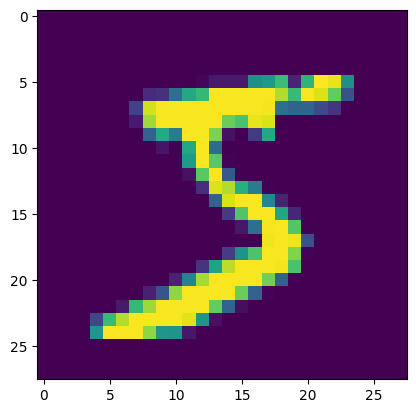

In [ ]:
# [1, 28, 28] : 흑백차원, 가로, 세로

import matplotlib.pyplot as plt

img = trainset[0][0]
print(img.squeeze().shape)
plt.imshow(img.squeeze(), cmap='gray')

##### DataLoader & Dataset


`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [ ]:
# batch_size=8 : 데이터를 8개씩 가져온다.
# shuffle=True : 랜덤하게 섞는다.
# num_workers=2 : parallel하게 동작할 수 있도록 한다.
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

# test임으로 shuffle=False
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
# 이렇게 하면 확인이 불가능하다.

train_loader

In [ ]:
# 다음 함수를 통해 DataLoader()안의 값을 확인할 수 있다.

dataiter = iter(train_loader) # 1개만 확인해보자
images, labels = next(dataiter) # 문법이 바뀜; x.next() -> next(x)
images.shape, labels # tensor의 형태이다.
# 사진 갯수 8개, 흑백(1), 사진의 크기 28x28
# label 갯수 8개

(torch.Size([8, 1, 28, 28]), tensor([3, 4, 9, 4, 2, 4, 7, 5]))

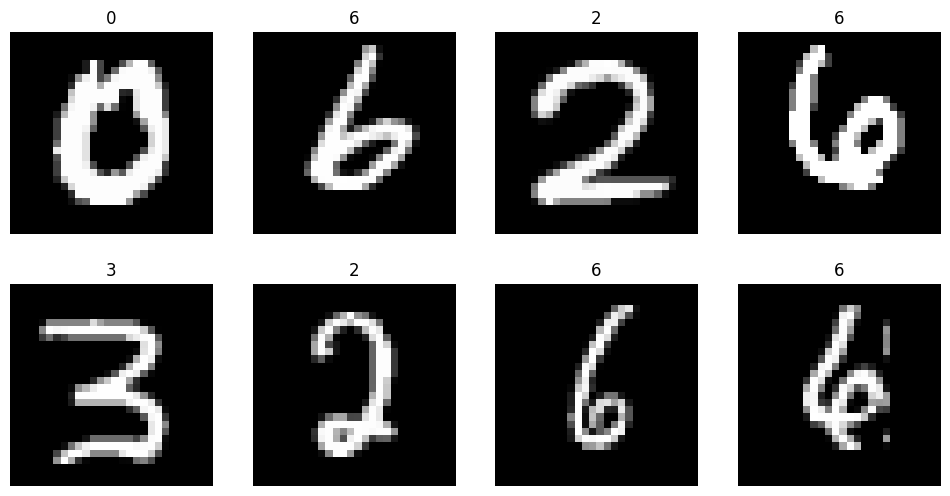

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1): # batch_size인 8개만 2행,4열로 가져오자.
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    # random으로 1~60,000개의 데이터 중에 하나를 선택한다.

    # len(trainset) : 60,000
    # size=(1,) : 1개 차원의 벡터
    # .item() : scaler형태의 tensor를 숫자로 가져온다.
    # 차원이 1인 scaler가 아니면, 사용이 불가능하다.

    img, label = trainset[sample_idx] # trainset의 하나를 랜덤으로 선택해서, img랑 label로 둔다.
    figure.add_subplot(rows, cols, i) # 어떤 영역에 그릴지 선택한다.
    plt.title(label) # 제목은 label로
    plt.axis('off') # 축이름은 없앤다.
    plt.imshow(img.squeeze(), cmap='gray') # img의 흑백차원을 없애고, 회색으로 시각화를 한다.
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


개인적으로는 layer라는 의미보다는 filter가 더 맞다고 생각한다.

### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [ ]:
import torch.nn as nn

1. `nn.Linear` 계층 예제
    * 2차원 tensor

In [ ]:
# input-features
input = torch.randn(128, 20) # (행,열)
# print(input, '\n')

# layer
m = nn.Linear(20, 30) # in-features = 20, out-features = 30, bias(상수항)도 있다.
# print(m, '\n')


# output
# input에 함수형태로 layer 적용
output = m(input)
# print(output, '\n')

print(input.size()) # 128x20 = A
print(m) # 20x30 = B
print(output.size()) # 128x30 = AB <- 행렬곱이라고 생각

torch.Size([128, 20])
Linear(in_features=20, out_features=30, bias=True)
torch.Size([128, 30])


2. `nn.Conv2d` 계층 예시
    * 4차원 tensor

In [ ]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [ ]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=2)
m

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))

In [ ]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))

In [ ]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

In [ ]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

<img src="https://github.com/ksouth0413/dltutorial/raw/main/PyTorch%20KR/photo/basic(3).jpeg" height="300">

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
# 간단하게 nn.Conv2d(1, 20, 5, 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu')) # cpu에 저장
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인
* 순서가 달라진다.
* out-channels, in-channels, kernel_size
* 갯수, 두께, 가로x세로

In [ ]:
weight = layer.weight
weight.shape # weight(가중치)의 크기; (20,1) : in & out channels를 맞추기 위한 크기 / (5,5) : kernel(filter)-size

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weight = weight.detach()

weight = weight.numpy()
type(weight), weight.shape

(numpy.ndarray, (20, 1, 5, 5))

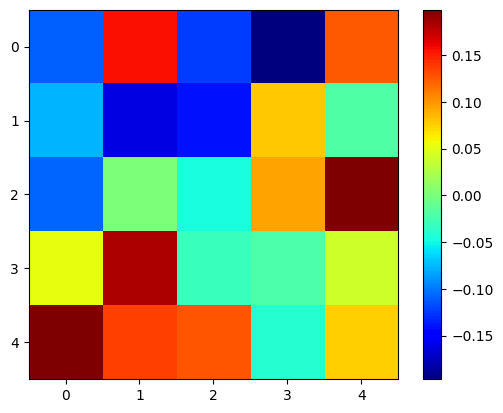

In [ ]:
# 5x5 filter 확인

plt.imshow(weight[0, 0, :, :], 'jet') # 'jet' : 화려하게
plt.colorbar()
plt.show()

In [ ]:
print(images.shape) # 이전에 사용한 MNIST로부터 가져온 image데이터
print(images[0].size()) # 8 = batch_size, 1 = 흑/백, 28x28 pixel-size

input_image = torch.squeeze(images[0])
# images[0] : 한 batch당 8개의 데이터(사진)가 있는데, 이중에서 한개의 사진을 가져온다.
# squeeze() : 1 = 흑/백 의 차원을 제거한다.
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
input_data = torch.unsqueeze(images[0], dim=0) # conv에 들어가는 이미지는 무조건 4차원!
print(input_data.size(), '\n')

torch.Size([1, 1, 28, 28]) 



In [ ]:
output_data = layer(input_data)
output_data.shape, output_data.grad_fn # grad_fn 도 포함되어 나온다.

(torch.Size([1, 20, 24, 24]), <ConvolutionBackward0 at 0x7e2dfd44e200>)

In [ ]:
output = output_data.data # data값만 추출해서 얻을 수 있다.
output.shape, output_data[0].shape # 앞에 차원이 사라지는지 여부

(torch.Size([1, 20, 24, 24]), torch.Size([20, 24, 24]))

In [ ]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

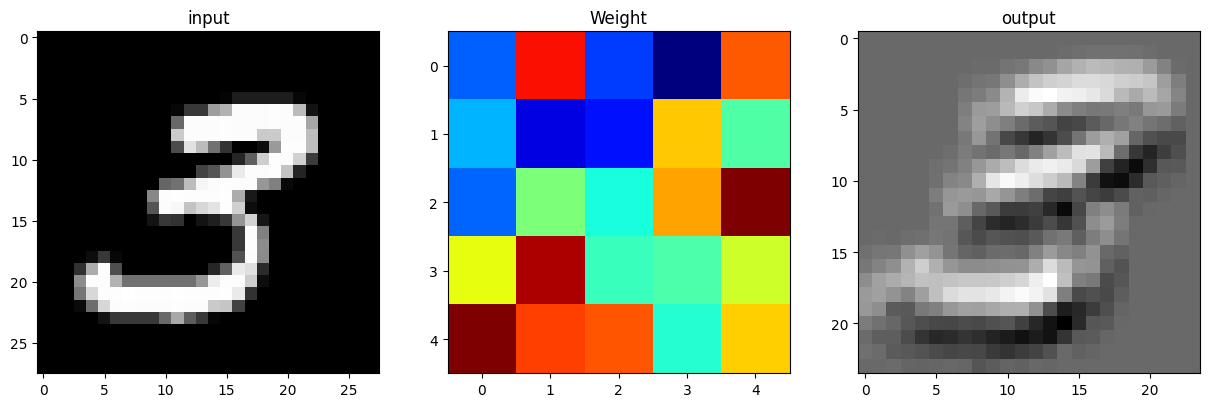

In [ ]:
plt.figure(figsize=(15,30))

# input
plt.subplot(131)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# filter
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet') # 가중치를 1겹으로 보았을 때, filter라고 보면 됨

# output
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray') # 1번째 데이터에 filter를 적용했을 때, 데이터가 어떻게 되는지
# plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
import torch.nn.functional as F

pool = F.max_pool2d(output, kernel_size=2, stride=2) # 2x2의 필터를 기준으로, 2만큼 이동하면서 큰 것만 뽑아줘

print(output.shape) # 24x24
print(pool.shape) # 12x12

torch.Size([1, 20, 24, 24])
torch.Size([1, 20, 12, 12])


In [ ]:
output[0,0,10:14,10:14] # torch는 마지막을 포함한다.; 적용전

tensor([[ 0.5818,  0.5169,  0.4090,  0.3089],
        [-0.0453, -0.1950, -0.3002, -0.5545],
        [-0.6087, -0.6143, -0.5828, -0.7395],
        [-0.7573, -0.7099, -0.6153, -0.5073]])

In [ ]:
pool[0,0,5:7,5:7] # maxpool 적용후

tensor([[ 0.5818,  0.4090],
        [-0.6087, -0.5073]])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

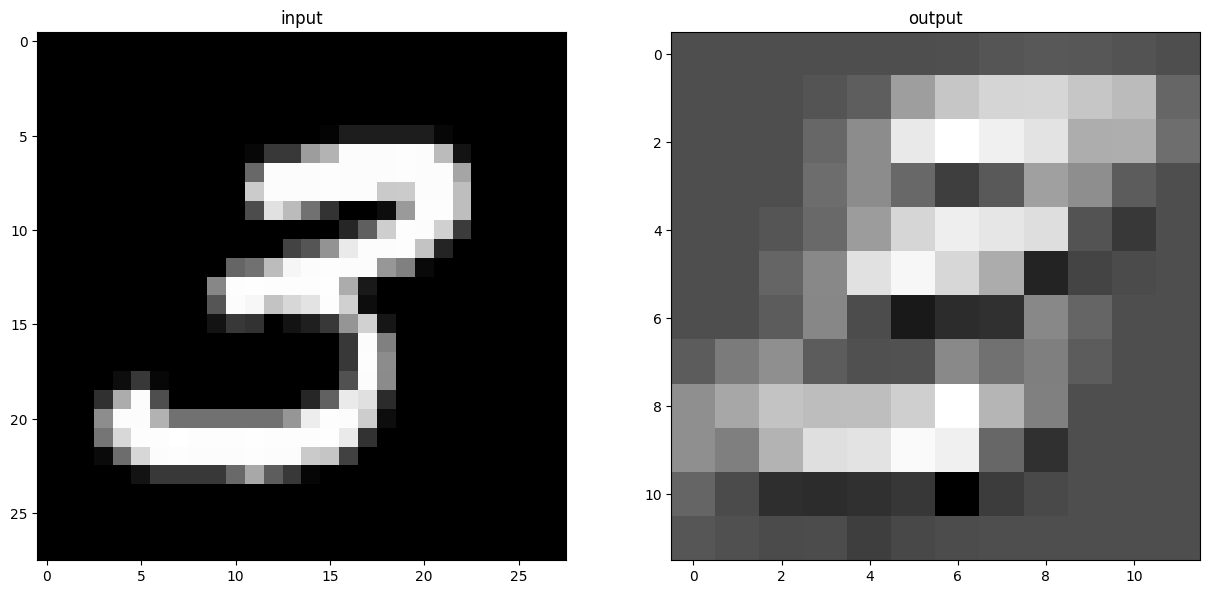

In [ ]:
plt.figure(figsize=(15,30))

# input
plt.subplot(121)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# maxpool(2,2) 적용이후
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:], 'gray') # 1번째 데이터에 maxpool-filter를 적용했을 때, 데이터가 어떻게 되는지; 해상도가 줄어들었다.
plt.show()

In [48]:
input = torch.tensor(range(36), dtype=float).reshape(1,6,-1)
input

tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.],
         [12., 13., 14., 15., 16., 17.],
         [18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.]]], dtype=torch.float64)

In [49]:
F.max_pool2d(input, (2,2))

tensor([[[ 7.,  9., 11.],
         [19., 21., 23.],
         [31., 33., 35.]]], dtype=torch.float64)

In [50]:
F.max_pool2d(input, (2,))

tensor([[[ 7.,  9., 11.],
         [19., 21., 23.],
         [31., 33., 35.]]], dtype=torch.float64)

In [51]:
F.max_pool2d(input, 2) # kernel_size=stride으로 처리된다.

tensor([[[ 7.,  9., 11.],
         [19., 21., 23.],
         [31., 33., 35.]]], dtype=torch.float64)

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [ ]:
input_image.shape

torch.Size([28, 28])

In [ ]:
# view() : flatten(그냥 펴준다.)

flatten = input_image.view(1, 28 * 28) # 데이터를 펴준다.
flatten.shape

torch.Size([1, 784])

In [ ]:
# Linear() : 최종적으로 원하는 사이즈로 만들어준다.

lin = nn.Linear(784, 10)(flatten) # in-features = 784, out-features = 10; 784 -> 10
lin.shape

torch.Size([1, 10])

In [ ]:
# 우리가 흔히 아는 MLP에서의 층간의 가중치와 관련

x = nn.Linear(784, 10)
x.weight.shape

torch.Size([10, 784])

In [ ]:
# weight의 경우, detach를 해주어야 numpy로 변환이 가능하다.

# lin.numpy()
lin.detach().numpy() # 10개의 값

array([[-0.08804469, -0.00564737,  0.12361866,  0.0578276 , -0.5448097 ,
         0.14544636, -0.00466308, -0.00758287,  0.27320522,  0.47308776]],
      dtype=float32)

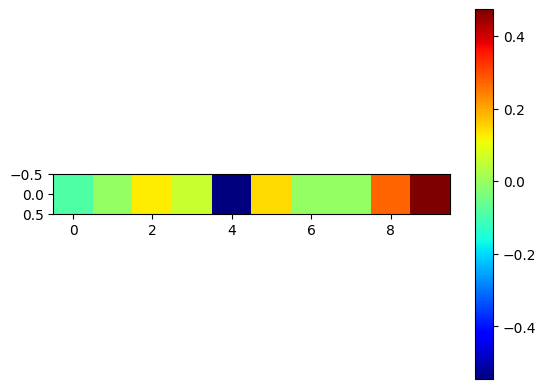

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet') # 10개의 linear-node값
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)


`1. F.softmax`

In [ ]:
flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경
softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용

softmax # grad_fn=<SoftmaxBackward0> 이 추가로 나타남; 마지막 연산은 softmax

tensor([[0.0883, 0.1172, 0.1130, 0.0857, 0.0718, 0.0777, 0.1370, 0.1012, 0.1318,
         0.0763]], grad_fn=<SoftmaxBackward0>)

In [ ]:
# import numpy as np

np.sum(softmax.detach().numpy(), axis=1) # detach 필수

array([1.], dtype=float32)

In [ ]:
# detach 안하는 방법

with torch.no_grad(): # 이 안에서는 기울기 계산을 따로 하지 않는다.; 이렇게 해야 나중에 detach() 등을 할 필요가 없다.
    flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
    lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경

    softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용
# dim=1 : 하나의 행 안에서 열이 각각의 값으로 생각하여, 합이 1이 되도록 prob형태로 만든다.
# 즉, 각 행별로 나눈다음, 열끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

softmax

tensor([[0.0746, 0.1582, 0.0795, 0.0818, 0.0989, 0.1312, 0.1209, 0.0790, 0.1144,
         0.0615]])

In [ ]:
# dim=0 : 각 열별로 나눈다음, 행끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

with torch.no_grad():
    softmax = F.softmax(lin, dim=0) # 최종 결과에 활성화함수 적용

softmax

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

`2. F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [ ]:
# remark
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# .to(device) : 본래 cpu에 저장된 tensor변수를 gpu에 저장한다.

inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
# # layer 선언
# layer = nn.Conv2d(3, 20, 5, 1)

# # output 선언; input을 layer에 통과시켜 만든다.
# output = F.relu(layer(inputs))
# output.shape

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
# layer 선언
layer = nn.Conv2d(3, 20, 5, 1).to(device) # input이 gpu에 저장되면, layer인 weight도 gpu에 저장해주어야한다.

# output 선언; input을 layer에 통과시켜 만든다.
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [ ]:
# 1. nn에서 ReLU()() 가져오기

nn.ReLU()(torch.tensor(1))

tensor(1)

In [ ]:
# 2. nn.functional에서 relu() 가져오기
import torch.nn.functional as F

F.relu(torch.tensor(1))

tensor(1)

### 신경망 종류

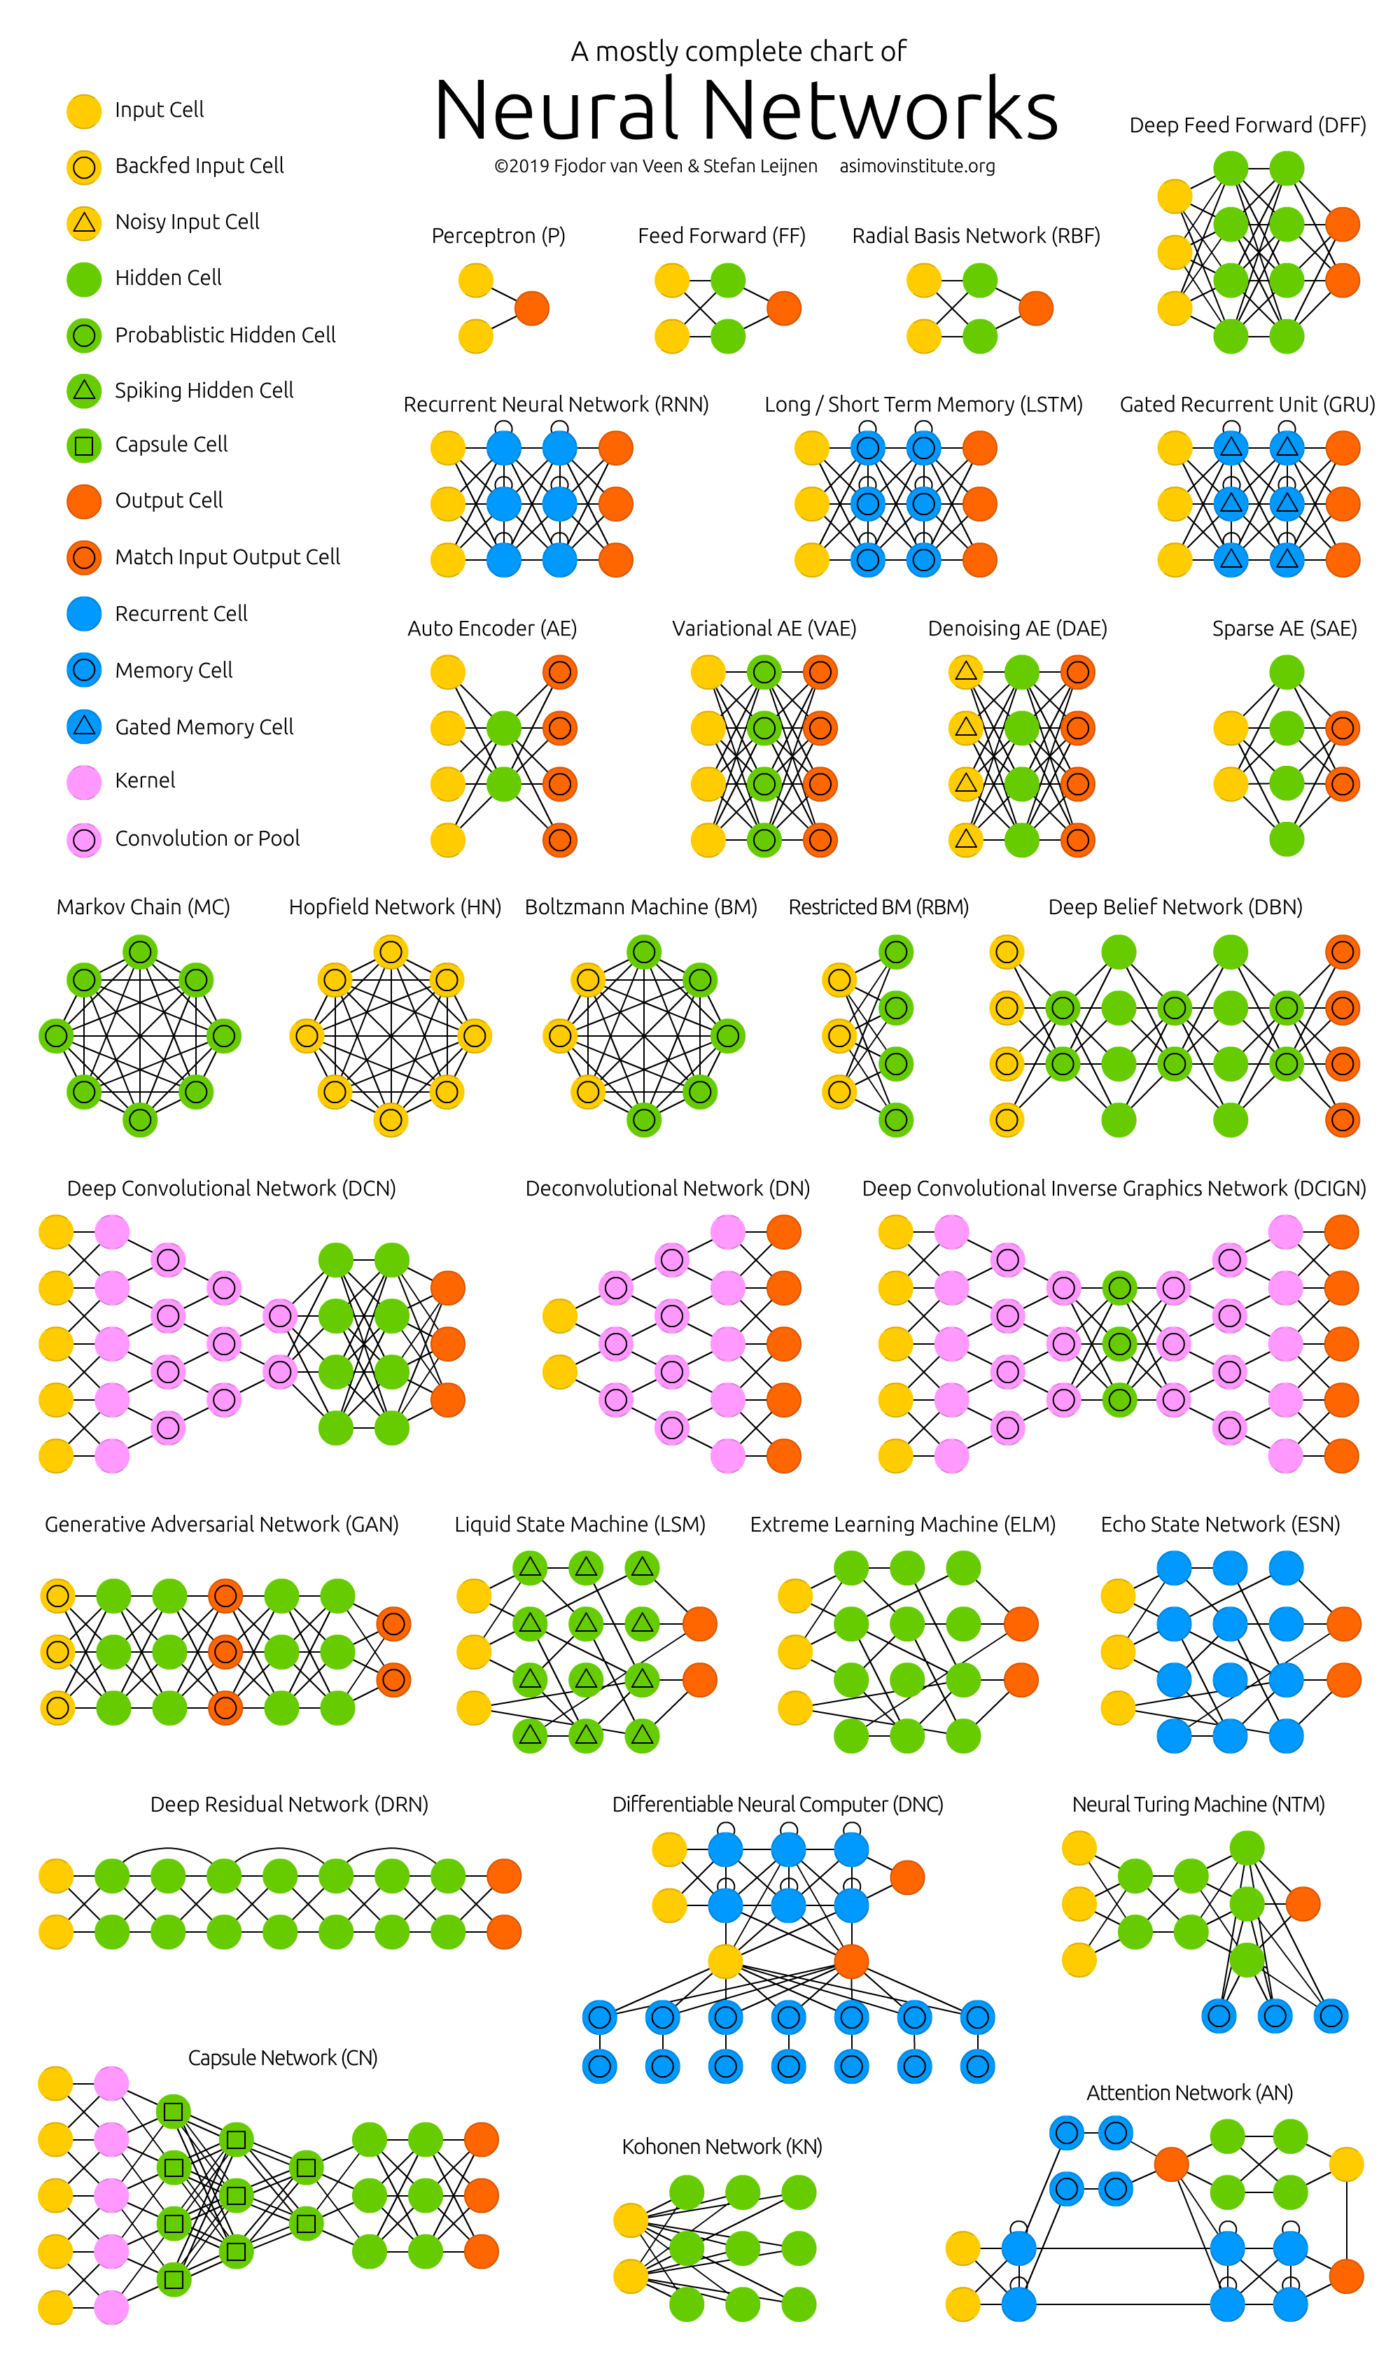

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [ ]:
class Model(nn.Module): # nn에 있는 Module라는 클래스를 상속한 클래스를 만든다.

    # Model이라는 class에서 사용할 변수 선언
    def __init__(self, inputs): # inputs = 투입되는 변수

        super(Model, self).__init__()
        # 부모 클래스의 __init__() 매직 메소드를 자식 클래스의 __init__() 매직 메소드에서 실행 한다.
        # 즉, 부모 클래스인 nn.Module에서 정의된 변수를 자식 클래스인 Model에서 사용하고 싶을 때, 이용한다.
        # 참고자료 : https://supermemi.tistory.com/entry/Python-3-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%B4%EB%9E%98%EC%8A%A4%EC%9D%98-super-%EC%97%90-%EB%8C%80%ED%95%B4-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90-superinit-super%EC%9D%98-%EC%9C%84%EC%B9%98
        # 참고. vs 매서드 오버라이딩
        # 매서드 오바라이딩이란? 부모 클래스에서 사용하는 함수/매서드 중 일부를 변경해서 사용한다.
        # 참고자료 : https://junior-datalist.tistory.com/96

        self.layer = nn.Linear(inputs, 1) # layer변수를 inputs -> 1 로 바꾸는 Linear로 정의
        self.activation = nn.Sigmoid() # activation변수를 Sigmoid라는 활성화함수로 정의


    # 위에서 정의한 변수들을 가지고, 직접 NN 구조를 만들어보자.
    def forward(self, x): # x : input-data

        x = self.layer(x) # 먼저, input-data를 layer변수로 정의된 'Linear()' layer를 통과시켜 inputs -> 1 사이즈로 만든다.
        x = self.activation(x) # 계속해서, 1로 사이즈를 줄인 데이터에 activation변수로 정의된 'Sigmoid()' 활성화함수를 이용해 최종적으로 값을 낸다.

        return x

In [ ]:
model = Model(1) # inputs가 1인 Model class를 model변수로 정의한다.
print(list(model.children()), '\n\n') # 만든 model의 구조를 살펴본다. nn.Module에 있는 함수/매서드 'children()'

print(list(model.modules()), '\n\n') # 위의 children() 보다 더 많은 정보를 제공
print(list(model.modules())[0], '\n')
print(list(model.modules())[1], '\n') # children() 과 같다.

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
) 

Linear(in_features=1, out_features=1, bias=True) 



### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

remark) 모듈 = layer가 2개 이상 있을 때, 즉, nn.Sequential은 2개 이상의 layer나 activation-function을 묶어서 정의할 때, 사용한다.

In [ ]:
class Model(nn.Module):

    # 사용할 변수 선언
    def __init__(self):
        super(Model, self).__init__()
        # 여기까지는 동일하다.
        # layer를 하나하나 정의하지 않고, 묶어서 정의한다.

        # 1번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer1 = nn.Sequential( # layer라는 변수를 Sequential()라는 걸 통해 정의
            # 3 -> 64, filter-size = 5x5
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            # F.relu와 동일
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 2번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer2 = nn.Sequential(
            # 64 -> 30, filter-size = 5x5
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 3번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer3 = nn.Sequential(
            # 여기서 주의할 점은 30x5x5 짜리 matrix를 어떻게 1x1x(30*5*5)짜리 matrix로 바꿀 수 있냐인데,
            # 이후의 forward() 과정에서 view(1, 30*5*5)를 통해 flatten을 해준다.
            # 30*5*5 -> 10
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

    # 선언한 변수들을 가지고 NN 구조 형성
    def forward(self, x):
        #
        x = self.layer1(x) # Sequential()로 만든 layer1이라는 layer집합들 적용
        x = self.layer2(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        x = x.view(x.shape[0], -1) # Linear적용전에 flatten을 해준다.
        x = self.layer3(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        return x

In [ ]:
model = Model()

print(list(model.children()), '\n\n')
print('-'*100)
print(list(model.modules()), '\n')

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 


----------------------------------------------------------------------------------------------------
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0)

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용
* 학습이 완료되고 모델끼리 비교할 때 사용하는 평가 함수랑은 다르다.

In [ ]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링
* 분류

In [ ]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# 분류문제

# 계산된 output(y_pred; y_pred)와 실제 output(y_label; target) 정의

preds = torch.randn(10,5) # 10개의 데이터, 5개의 class
print(preds, '\n')

preds = torch.randn(10,5).softmax(dim=-1) # 마지막 차원기준
print(preds, '\n') # 각 행안에서 값들의 합이 1이된다.

sum = np.sum(preds.detach().numpy(), axis=1)
print(sum, '\n')

y_pred = np.argmax(preds.detach().numpy(), axis=1) # 각 행별로 가장 큰 prob의 class를 가져옴.
print(y_pred, '\n')

target = torch.randint(5, (10,)) # 10짜리 matrix를 랜덤으로 생성 <- 이걸 일단 답이라고 하자.
print(target, '\n')

print('acc :', len(np.where(y_pred == target.detach().numpy())[0]) / 10)

tensor([[-0.5670, -0.0906,  1.2281,  0.1348, -0.7716],
        [ 0.1781, -0.3624, -0.0094,  0.9760,  0.0240],
        [ 1.0196,  3.1101, -0.0986, -0.6907, -2.0455],
        [-0.9262, -2.4550,  0.3473,  0.2001, -3.0704],
        [ 0.5370,  0.3715, -1.4290, -0.1241, -0.1016],
        [-0.7102,  0.8862,  0.0916, -2.5572, -0.2930],
        [ 2.2071,  1.1600, -0.4361, -1.2023, -0.6765],
        [-0.4002,  0.4380, -0.1302, -1.6680, -0.6307],
        [ 0.3599,  1.3509,  0.4715,  2.4693,  0.2072],
        [ 0.1708, -0.7060,  0.5204, -0.6704,  0.3154]]) 

tensor([[0.0395, 0.3968, 0.1267, 0.1126, 0.3244],
        [0.3199, 0.1598, 0.1137, 0.3655, 0.0410],
        [0.2594, 0.1764, 0.1696, 0.1435, 0.2511],
        [0.0527, 0.3636, 0.1468, 0.2878, 0.1491],
        [0.1915, 0.0999, 0.1881, 0.2598, 0.2607],
        [0.0546, 0.5800, 0.0446, 0.0229, 0.2979],
        [0.5871, 0.2412, 0.0915, 0.0332, 0.0470],
        [0.4532, 0.0681, 0.3207, 0.0533, 0.1047],
        [0.0475, 0.1350, 0.6411, 0.1198, 0.0566

In [ ]:
# 평가함수 <- 바로 계산

import torchmetrics

torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)

tensor(0.1000)

multi-class vs multi-label
* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221714823560

In [ ]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)
# 이렇게 해서 accuracy 함수를 따로 가져올수도 있다.

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10, ))
print(preds.shape)
print(target.shape, '\n')

acc1 = metric(preds, target)
print(acc1)
acc2 = metric.compute()
print(acc2)


torch.Size([10, 5])
torch.Size([10]) 

tensor(0.1000)
tensor(0.1000)


# CNN 모델구현 1
* Regression Model

## 선형 회귀 모델(Linear Regression Model)

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### 데이터 생성

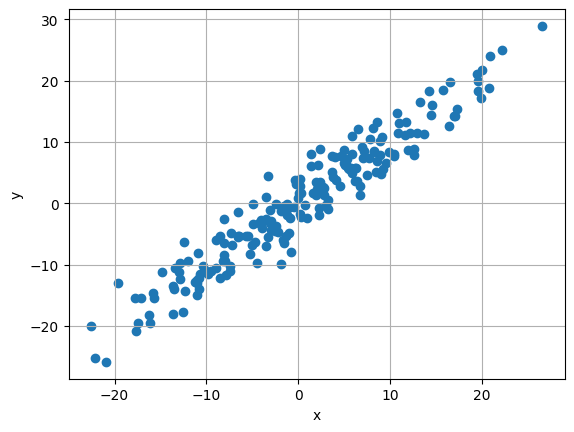

In [28]:
X  = torch.randn(200, 1) * 10 # N(0,1)분포
# print(X.shape) # 200x1 크기의 탠서
y = X + 3 * torch.randn(200, 1) # y = x + e, e ~ 3*N(0,1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [35]:
import torch.nn as nn

class LRModel(nn.Module):

    def __init__(self):
        super(LRModel, self).__init__() # 여기까지는 필수

        # 클래스 내에서 사용할 변수선언
        self.linear = nn.Linear(1,1) # 1 -> 1; x값 1개로, y값 1개를 유추하는 문제이다.
        # 따라서 weight 1개, bias 1개로 변수2개이다.

    # nn 구조 형성
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [36]:
model = LRModel()
print(model, '\n')
print(list(model.parameters())) # weights

LRModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
) 

[Parameter containing:
tensor([[-0.6619]], requires_grad=True), Parameter containing:
tensor([-0.4020], requires_grad=True)]


In [37]:
w, b = model.parameters()

# w
print(w, '\n')
print(w[0], '\n')
print(w[0][0], '\n')
print(w[0][0].item(), '\n') # 2개의 대괄호로 둘러쌓여 있다.
print('-'*50)

# b
print(b, '\n')
print(b[0], '\n')
print(b[0].item(), '\n') # 1개의 대괄호로 둘러쌓여 있다.

Parameter containing:
tensor([[-0.6619]], requires_grad=True) 

tensor([-0.6619], grad_fn=<SelectBackward0>) 

tensor(-0.6619, grad_fn=<SelectBackward0>) 

-0.6619118452072144 

--------------------------------------------------
Parameter containing:
tensor([-0.4020], requires_grad=True) 

tensor(-0.4020, grad_fn=<SelectBackward0>) 

-0.40202534198760986 



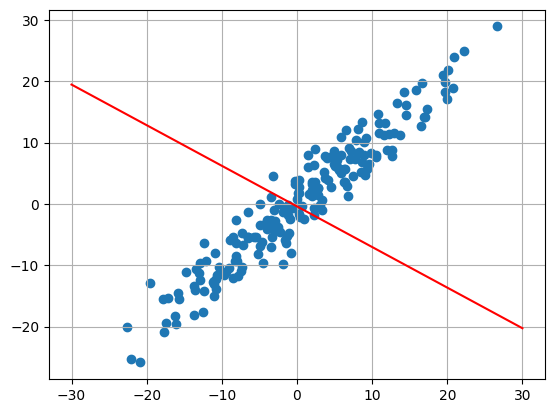

In [38]:
w1, b1 = w[0][0].item(), b[0].item() # 그냥 들어있는 초기값
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r') # 아직 학습안된 직선
plt.scatter(X,y) # 학습 데이터
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [39]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

#### 전체 과정

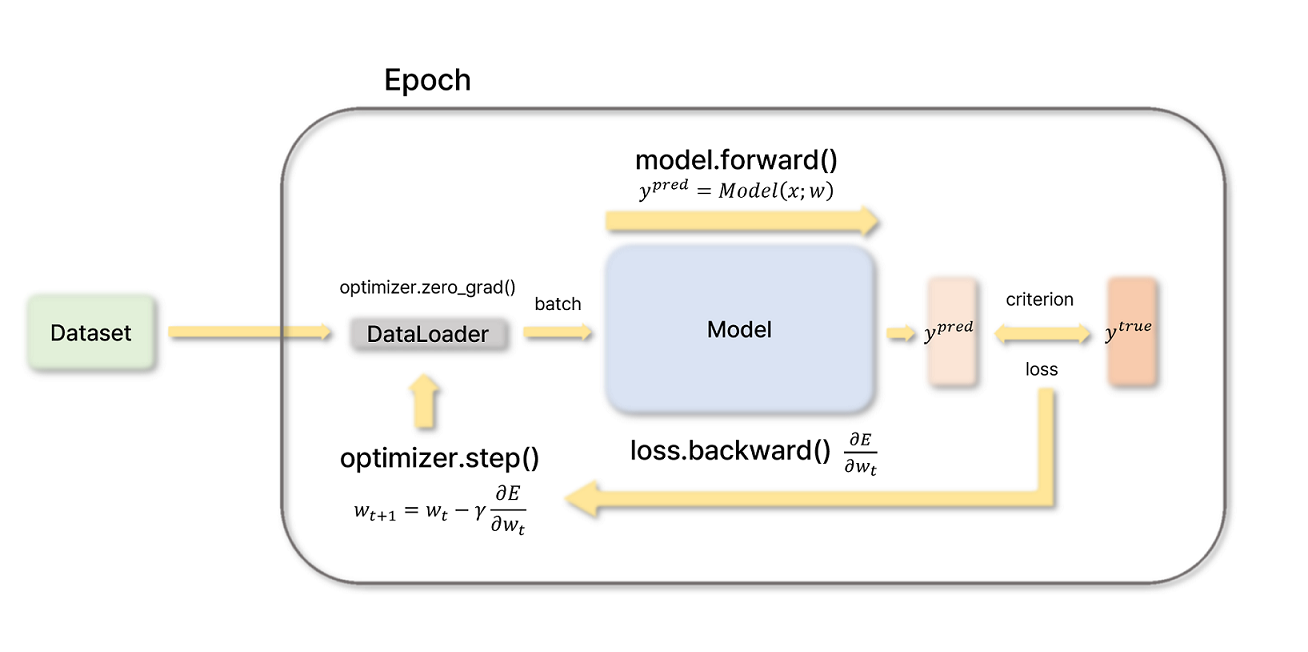

#### 학습 코드

In [61]:
epochs = 3 # epochs : 1번의 epochs당 데이터 전체를 통해 학습을 한 것이다.
# mini-batch Gradient Descent에서 모든 미니 배치가 가중치 학습에 한 번씩 사용되면 '1-epoch'가 진행되었다고 한다.
# epoch마다 weight가 update된다.

loss_list = [] # loss 변화 저장 장소

for epoch in range(epochs):
    print(f'epoch{epoch+1}')

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X) # model에 넣어 예측
    # list(model.children()) -> [Linear(in_features=1, out_features=1, bias=True)]

    w1, b1 = model.parameters()
    print(f'w1 : {w1.item()}\nb1 : {b1.item()}\n')

    loss = criterion(y_pred, y) # MSE로 손실함수 계산
    loss_list.append(loss.item()) # tensor -> list

    loss.backward() # gradient 계산

    optimizer.step() # 계산된 grad를 바탕으로 weight-update

print(f'loss:{loss_list}')

epoch1
w1 : 0.9972473978996277
b1 : -0.37881752848625183

epoch2
w1 : 0.9990351796150208
b1 : -0.37814074754714966

epoch3
w1 : 1.0004740953445435
b1 : -0.37746670842170715

loss:[8.297667503356934, 8.294325828552246, 8.292003631591797]


### 자세히 들여다보기

#### 어떤 값을 관찰해야할까?
* train data & parameter (볼필요x)
* weights (정답)

1. train data & parameter

* X, y <- 상수 = requires_grad_(False)
* y_pred, loss <- 예측값 = requires_grad_(True)

1. X,y는 gradient를 추적하지 않는다.
2. y_pred는 model함수의 결과값임으로 gradient가 추적된다.
3. loss는 y_pred으로 만든 값임으로 gradient가 추적된다.
4. y_pred, loss는 grad가 추적되지만, backward()를 해도 update가 되지 않는다. 따라서 None으로 나옴.(update가 되는 값은 w1과 b1이다.)


In [74]:
# X  = torch.randn(200, 1) * 10
# print(X)
print(X.grad, X.grad_fn) # gradient 추적x

# y = X + 3 * torch.randn(200, 1)
# print(y)
print(y.grad, y.grad_fn, '\n') # gradient 추적x

# y_pred = model(X)
print(y_pred.grad, y_pred.grad_fn) # Add

# loss = criterion(y_pred, y)
print(loss.grad, loss.grad_fn,'\n') # MSE

None None
None None 

None <AddmmBackward0 object at 0x7b7f03edebf0>
None <MseLossBackward0 object at 0x7b7efce82d10> 



<ipython-input-74-ddd6b2be58de>:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y_pred.grad, y_pred.grad_fn) # Add
<ipython-input-74-ddd6b2be58de>:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/py

2. weights
* (w1,b1) : backward()에 따라 update되는 변수


* gradient가 계산되어 grad에 들어가있다.
* grad_fn = None으로 다른 걸로 만들어진 값이 아니다.

In [75]:
# w1, b1 = model.parameters()

print('w1 :', w.grad, w.grad_fn)
print('b1 :', b.grad, b.grad_fn)

w1 : tensor([[-1.1580]]) None
b1 : tensor([-0.6716]) None


In [78]:
# # 참고 : indexing을 하면 계산한 값으로 생각된다.

# k = w[0][0]
# print(k, k.grad, k.grad_fn)

tensor(1.0016, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x7b7fdf44d000>


<ipython-input-78-d980c4cc2405>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(k, k.grad, k.grad_fn)


#### 모델 재정의

때에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문임으로 위의 모델 재정의 후에 다시 학습해야한다.

In [96]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#### 1. optimizer.zero_grad()
* 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화


`optimizer.zero_grad()` 사용

In [128]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [129]:
# optimizer.zero_grad() 사용

epochs = 10

w_grad_list = []
b_grad_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    w, b = model.parameters()

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())

    optimizer.step()

`optimizer.zero_grad()` 사용안함

In [130]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [131]:
# 매 epoch 마다 'optimizer'의 gradient를 초기화해주지 않을 때,
# 이전 epoch의 gradient값이 다음 epoch의 gradient에 누적되어 들어간다.

epochs = 10

w_grad_list_no_zero = []
b_grad_list_no_zero = []

for epoch in range(epochs):

    # optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    w, b = model.parameters()

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_zero.append(w.grad.item())
    b_grad_list_no_zero.append(b.grad.item())

    optimizer.step()

시각화

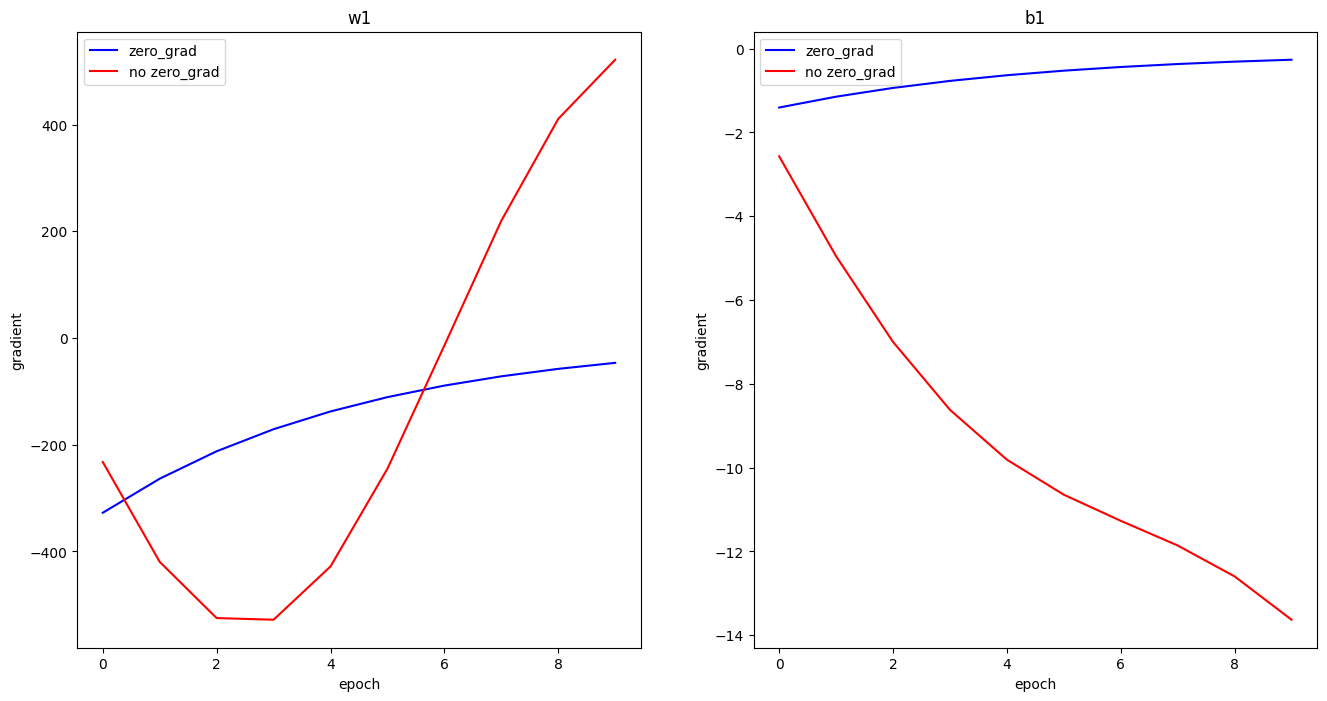

In [132]:
plt.figure(figsize=(16, 8))

grad_dict = {'w1':[w_grad_list,w_grad_list_no_zero],
             'b1':[b_grad_list,b_grad_list_no_zero]}

for i in range(len(grad_dict)):
    plt.subplot(1,2,i+1)
    grad_list = list(grad_dict.values())[i][0]
    no_grad_list = list(grad_dict.values())[i][1]
    plt.plot(range(len(grad_list)), grad_list, color='blue', label='zero_grad')
    plt.plot(range(len(no_grad_list)), no_grad_list, color='red', label='no zero_grad')
    plt.legend()
    plt.title(list(grad_dict.keys())[i])
    plt.xlabel('epoch')
    plt.ylabel('gradient')
plt.show()

# gradient를 매 epochs마다 0으로 만들지 않으면, 이전 gradient가 누적되어 이상하게 된다.
# 아래 결과도 no zero_grad의 크기가 엄청 크게 나온다.

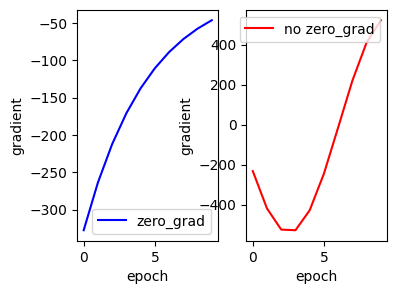

In [133]:
# w

t_grad_list = [w_grad_list,w_grad_list_no_zero]
c_list = ['blue','red']
label_list = ['zero_grad','no zero_grad']

plt.figure(figsize=(4, 3))

for i in range(len(t_grad_list)):
    plt.subplot(1,2,i+1)
    grad_list = t_grad_list[i]
    plt.plot(range(len(grad_list)), grad_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('gradient')
plt.show()

# zero_grad()를 하지 않으면, y축의 gradient가 크게 변한다.

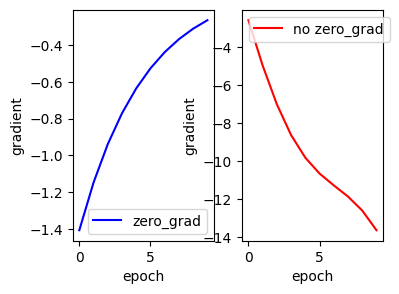

In [134]:
# b

t_grad_list = [b_grad_list,b_grad_list_no_zero]
c_list = ['blue','red']
label_list = ['zero_grad','no zero_grad']

plt.figure(figsize=(4, 3))

for i in range(len(t_grad_list)):
    plt.subplot(1,2,i+1)
    grad_list = t_grad_list[i]
    plt.plot(range(len(grad_list)), grad_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('gradient')
plt.show()

# zero_grad()를 하지 않으면, y축의 gradient가 크게 변한다.

#### 2. optimizer.step()
* 해당 epoch안에서 미니배치들로 인한 weight변화를 parameters에 적용하여 parameters값을 update한다.

`optimizer.step()`을 사용하지 않는다면,
* w_new = w_old - lr * grad인데 epoch마다 update가 되지 않는 것을 의미한다.
* 즉, 다음 epoch에 w_old가 w_new로 update가 되는 것이 아님으로 모든 epoch에서 w_old가 동일해 grad도 동일하다.
* 즉, w_val는 w_old로 유지
* grad는 w_old를 대입한 한 값으로 유지된다.

`optimizer.step()` 사용
* parameter의 update가 된다.

In [144]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [145]:
epochs = 10

# gradient 저장장소
w_grad_list = []
b_grad_list = []
# parameter 저장장소
w_list = []
b_list = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)
    w, b = model.parameters()

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())
    w_list.append(w.item())
    b_list.append(b.item())

    optimizer.step()

`optimizer.step()` 사용 안함
* parameter의 update가 되지 않는다.

In [146]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [147]:
# optimizer.step() 사용 안함; parameter의 update가 되지 않는다.

epochs = 10

# gradient 저장장소
w_grad_list_no_opt_step = []
b_grad_list_no_opt_step = []
# parameter 저장장소
w_list_no_opt_step = []
b_list_no_opt_step = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)
    w, b = model.parameters()

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_opt_step.append(w.grad.item())
    b_grad_list_no_opt_step.append(b.grad.item())
    w_list_no_opt_step.append(w.item())
    b_list_no_opt_step.append(b.item())

    # optimizer.step()

시각화

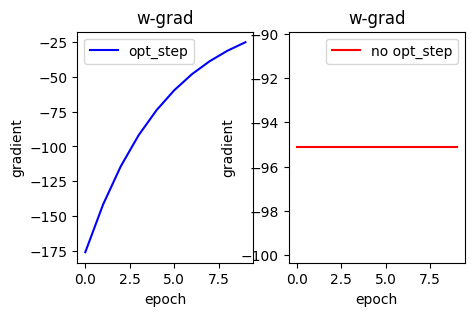

In [156]:
# w-gradient

t_grad_list = [w_grad_list,w_grad_list_no_opt_step]
c_list = ['blue','red']
label_list = ['opt_step','no opt_step']

plt.figure(figsize=(5, 3))

for i in range(len(t_grad_list)):
    plt.subplot(1,2,i+1)
    grad_list = t_grad_list[i]
    plt.plot(range(len(grad_list)), grad_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('gradient')
    plt.title('w-grad')
plt.show()

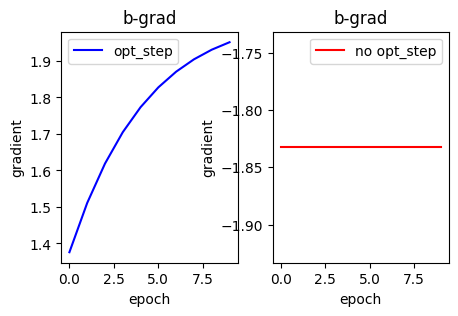

In [157]:
# b-gradient

t_grad_list = [b_grad_list,b_grad_list_no_opt_step]
c_list = ['blue','red']
label_list = ['opt_step','no opt_step']

plt.figure(figsize=(5, 3))

for i in range(len(t_grad_list)):
    plt.subplot(1,2,i+1)
    grad_list = t_grad_list[i]
    plt.plot(range(len(grad_list)), grad_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('gradient')
    plt.title('b-grad')
plt.show()

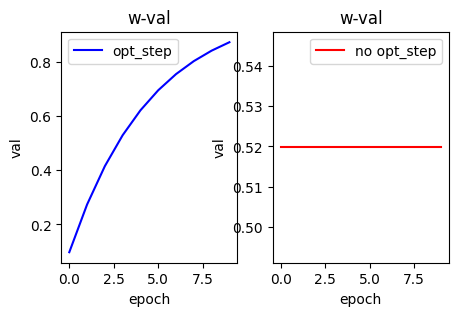

In [158]:
# w-value

t_val_list = [w_list,w_list_no_opt_step]
c_list = ['blue','red']
label_list = ['opt_step','no opt_step']

plt.figure(figsize=(5, 3))

for i in range(len(t_val_list)):
    plt.subplot(1,2,i+1)
    val_list = t_val_list[i]
    plt.plot(range(len(val_list)), val_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('val')
    plt.title('w-val')
plt.show()

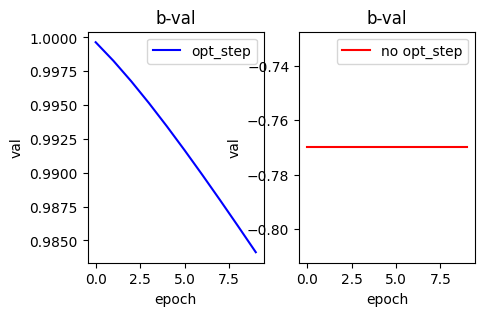

In [160]:
# b-value

t_val_list = [b_list,b_list_no_opt_step]
c_list = ['blue','red']
label_list = ['opt_step','no opt_step']

plt.figure(figsize=(5, 3))

for i in range(len(t_val_list)):
    plt.subplot(1,2,i+1)
    val_list = t_val_list[i]
    plt.plot(range(len(val_list)), val_list, color=c_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('val')
    plt.title('b-val')
plt.show()

### 최종결과

떄에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문임으로 위의 모델 재정의 후에 다시 학습해야한다.

In [161]:
model = LRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
loss_list = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    w, b = model.parameters()

    loss = criterion(y_pred, y)
    loss_list.append(loss.item())
    loss.backward()

    optimizer.step()

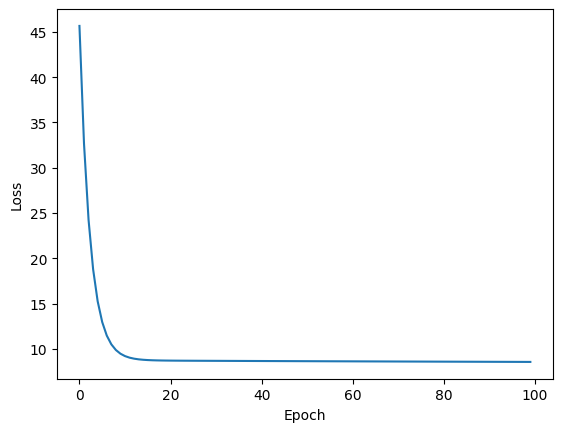

In [162]:
plt.plot(range(epochs), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

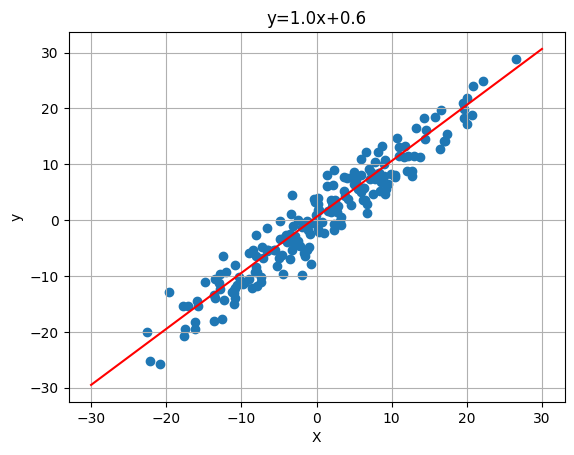

In [170]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'y={round(w1,1)}x+{round(b1,1)}') # 실제는 y=x
plt.grid()
plt.show()

# CNN 모델구현 2
* Classification Model

## FashionMNIST 분류 모델

In [1]:
import torch

In [2]:
# gpu에 변수를 저장하여, gpu를 통해 해당 연산을 처리하도록 함.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [3]:
# 데이터 전처리

import torchvision.transforms as transforms
from torchvision import datasets

transform_step = transforms.Compose([transforms.ToTensor(), # tensor로 펴준다.
                               transforms.Normalize((0.5,),(0.5,))]) # [0,1]->[-1,1] 정규화를 해준다.

In [4]:
# 데이터 분할 및 다운로드

trainset = datasets.FashionMNIST(root='/content',
                                 train=True, download=True,
                                 transform=transform_step)

testset = datasets.FashionMNIST(root='/content',
                                 train=False, download=True,
                                 transform=transform_step)

100%|██████████| 26421880/26421880 [00:13<00:00, 1997766.52it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 172255.05it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 871424.81it/s] 


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19108209.73it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [5]:
# 데이터 batch로 나누기

from torch.utils.data import Dataset, DataLoader

train_loader =  DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader =  DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

# num_workers=2 -> cpu와 gpu와 관련된 값으로 궁금할 경우, 아래 글 참고
# 참고글 : https://jybaek.tistory.com/799

In [6]:
# 데이터 확인

images, labels = next(iter(train_loader))
images.shape, labels.shape
# 128 : batch-size
# 1 : 흑백
# 28x28 : pixel-size

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

* 하나의 batch안에는 128개의 데이터가 들어있다.
    * 각 데이터는 X,y로 이루어져있다.
    * X : 1x28x28
    * y : 1
* 이러한 batch가 총 469개 존재한다.

In [67]:
images, labels = next(iter(train_loader))
total_batch = len(train_loader)

images.shape, labels.shape, total_batch

(torch.Size([128, 1, 28, 28]), torch.Size([128]), 469)

In [69]:
x = list(train_loader)

print(len(x[0])) # 1번째 dataloader (128개의 x, 128개의 y)
print(len(x[0][0])) # 128개의 x
print(x[0][0][0].shape, x[0][1][0].shape) # 1개 x의 크기, y의 크기

2
128
torch.Size([1, 28, 28]) torch.Size([])


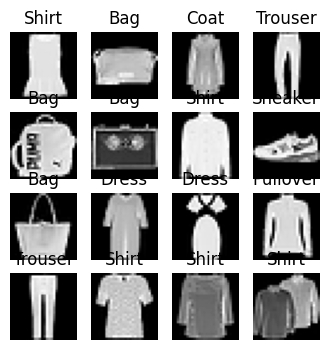

In [19]:
import matplotlib.pyplot as plt

labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(4,4))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    image = images[i].squeeze() # 1x28x28 -> 28x28
    label_idx = labels[i].item() # y_label
    label = labels_map[label_idx] # 위에서 해당되는 label

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()

### 모델 정의 및 파라미터

두 가지 방법으로 정의
- 그냥 일일이
- nn.Sequential()으로 묶어서

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class NN_Net1(nn.Module):
    def __init__(self):
        super(NN_Net1, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=0)
        # in-channels = 1 <- 흑/백
        # out-channels = 6
        # kernel_size / filter-size = 3x3 -> f=3
        # stride = 1(default) -> s=1
        # padding = 0(default) -> p=0
        # input-data pixel size = 28x28 -> n=28
        # (n-f+2p)/s + 1 = new n
        # (28-3+2x0)/1 + 1 = 26

        # maxpool : n=26 -> 13 forward에서 진행

        self.conv2 = nn.Conv2d(6, 16, 3)
        # in-channels = 6 <- 이전것의 out-channels
        # out-channels = 16
        # kernel_size / filter-size = 3x3 -> f=3
        # stride = 1(default) -> s=1
        # padding = 0(default) -> p=0
        # input-data pixel size = 13x13 -> n=13
        # (n-f+2p)/s + 1 = new n
        # (13-3+2x0)/1 + 1 = 11

        # maxpool : n=11 -> 5; 필터안에 데이터가 들어가지 않는다면, 그 부분은 무시한다.

        # 참고
        # MaxPooling2D 에 padding 이라는 옵션이 있습니다.
        # 기본값은 "valid" 인데요. padding 값이 "valid" 인 경우에는 끝에 남는 모서리 부분이 pool_size 와 맞지 않을 경우 그냥 무시합니다.
        # padding 값을 "same" 으로 설정하면, zero padding 을 추가하여 사이즈를 맞춘 뒤 처리를 하게 됩니다.

        self.fc1 = nn.Linear(16 * 5 * 5, 120) # out-channels x n x n
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 : 10개의 category

    def forward(self, x):
        print(f'input : {x.size()}')

        x = F.relu(self.conv1(x))
        print(f'conv1 : {x.size()}')
        x = F.max_pool2d(x, (2,2))
        print(f'maxpool : {x.size()}')

        x = F.relu(self.conv2(x))
        print(f'conv2 : {x.size()}')
        x = F.max_pool2d(x, 2)
        print(f'maxpool : {x.size()}')

        x = x.view(-1, self.num_flat_features(x)) # num_flat_features : 아래에서 정의
        print(f'view : {x.size()}')

        x = F.relu(self.fc1(x))
        print(f'fc1 : {x.size()}')
        x = F.relu(self.fc2(x))
        print(f'fc2 : {x.size()}')
        x = self.fc3(x)
        print(f'fc3 : {x.size()}')

        return x

    def num_flat_features(self, x): # 처음 dim-size을 제외하고, 모두 곱한 값을 반환해준다.
        size = x.size()[1:] # 처음 제외
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [39]:
# nn.Sequential() 사용
# layer를 하나하나 정의하지 않고, 묶어서 정의한다.

class NN_Net2(nn.Module):

    def __init__(self):
        super(NN_Net2, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(inplace=True), # F.relu와 동일(Sequential안에서 주로 사용)
            nn.MaxPool2d(2) # F.max_pool2d와 동일(마찬가지로 Sequential안에서 사용)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(16*5*5, 120, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.layer3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [40]:
net1 = NN_Net1()
net2 = NN_Net2()
print(net1,'\n\n' ,net2)

NN_Net1(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
) 

 NN_Net2(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [45]:
out = net1.forward(images)

input : torch.Size([128, 1, 28, 28])
conv1 : torch.Size([128, 6, 26, 26])
maxpool : torch.Size([128, 6, 13, 13])
conv2 : torch.Size([128, 16, 11, 11])
maxpool : torch.Size([128, 16, 5, 5])
view : torch.Size([128, 400])
fc1 : torch.Size([128, 120])
fc2 : torch.Size([128, 84])
fc3 : torch.Size([128, 10])


In [44]:
input = torch.randn(1, 1, 28, 28)
out = net1(input)

input : torch.Size([1, 1, 28, 28])
conv1 : torch.Size([1, 6, 26, 26])
maxpool : torch.Size([1, 6, 13, 13])
conv2 : torch.Size([1, 16, 11, 11])
maxpool : torch.Size([1, 16, 5, 5])
view : torch.Size([1, 400])
fc1 : torch.Size([1, 120])
fc2 : torch.Size([1, 84])
fc3 : torch.Size([1, 10])


In [47]:
# 파라미터 갯수 및 차원 확인

params = list(net1.parameters())
print(len(params), '\n')
# 총 10개(번갈아가면서)
# 1. filter-size고려 : 5개(conv1,conv2,fc1,fc2,fc3; pooling은 필요없다.)
# 2. bias : 5개

for i in range(len(params)):
    print(params[i].size())
# conv1 : 6x1x3x3 <- 1x3x3짜리 weight matrix가 6개 있다고 생각
# bias1 : 각 weight matrix마다 bias가 하나씩 존재
# fc1 : 120x400 <- (400->120)으로 만들기 위한 weight matrix

10 

torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


### 모델 재정의

In [52]:
import torch.nn as nn
import torch.nn.functional as F

class NN_Net(nn.Module):
    def __init__(self):
        super(NN_Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(-1, self.num_flat_features(x))

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [53]:
net = NN_Net()

### 손실함수와 옵티마이저

In [55]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

In [75]:
loss_list = []

for epoch in range(10):

    running_loss = 0.0 # CrossEntropyLoss값 1개; scaler

    # i = 0 ~ 468개의 batch
    # 각 batch에 들어있는 data크기(128개 이미지) = 128x1x28x28
    # (중요) 즉, batch(128개 이미지)마다 grad-update가 일어난다.
    # 전체 데이터를 한번만 도는데, epoch를 10으로 해서
    # 총 전체 데이터를 10번씩 사용한다.
    for i, data in enumerate(train_loader, start=0):

        inputs, labels = data

        optimizer.zero_grad() # epoch마다 gradient 0으로 초기화

        outputs = net(inputs) # y_pred = f(X)
        loss = criterion(outputs, labels) # CrossEntropyLoss; 0~1 사이값
        loss.backward() # back-propagation; gradient 계산
        optimizer.step() # parameters(weights) update

        running_loss += loss.item() # 그냥 전체적인 비교를 위해 누적함

        if i % 100 == 99: # 100번 마다 확인; epoch=10, iter(=i)=469, batch=128
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/100))
            loss_list.append(running_loss/100)
            running_loss = 0.0 # 100개의 batch(총 이미지 100x128개)마다 CE loss 총합을 계산
# gradient는 epoch마다 초기화되지만,
# weight는 계속 누적되어 이전 epoch값이 계속 사용된다.
# 따라서 epoch가 진행될수록 loss가 계속 감소할 수 있다.
# 결론
# X,y는 변화x
# grad는 iter안에서만 변화, epoch가 변하면 다시 0으로 초기화되어서 다시 변화
# weight는 매 iter마다, epoch마다 변한다.
# 즉, weight를 학습시킨다고 보면 된다.

Epoch: 1, Iter: 100, Loss: 0.7502094143629074
Epoch: 1, Iter: 200, Loss: 0.7255070453882217
Epoch: 1, Iter: 300, Loss: 0.7169554615020752
Epoch: 1, Iter: 400, Loss: 0.6846180105209351
Epoch: 2, Iter: 100, Loss: 0.6562921261787414
Epoch: 2, Iter: 200, Loss: 0.6468016621470452
Epoch: 2, Iter: 300, Loss: 0.6286236143112183
Epoch: 2, Iter: 400, Loss: 0.5943556165695191
Epoch: 3, Iter: 100, Loss: 0.5952332711219788
Epoch: 3, Iter: 200, Loss: 0.5843515589833259
Epoch: 3, Iter: 300, Loss: 0.5773926702141762
Epoch: 3, Iter: 400, Loss: 0.5467158487439155
Epoch: 4, Iter: 100, Loss: 0.5457499721646308
Epoch: 4, Iter: 200, Loss: 0.5321116024255752
Epoch: 4, Iter: 300, Loss: 0.5356744360923767
Epoch: 4, Iter: 400, Loss: 0.5210080328583717
Epoch: 5, Iter: 100, Loss: 0.510058975815773
Epoch: 5, Iter: 200, Loss: 0.5198100811243057
Epoch: 5, Iter: 300, Loss: 0.5127711322903633
Epoch: 5, Iter: 400, Loss: 0.49479839533567427
Epoch: 6, Iter: 100, Loss: 0.47765500873327255
Epoch: 6, Iter: 200, Loss: 0.4908

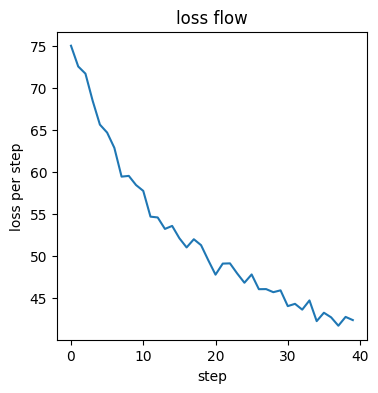

In [78]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(4,4))
plt.plot(loss_list)
plt.xlabel('step')
plt.ylabel('loss per step')
plt.title('loss flow')
plt.show()

### 모델의 저장 및 로드

`net.state_dict()`

In [86]:
# 모델의 weights & bias를 담은 dictionary

for key, value in net.state_dict().items():
    print(f'{key} : {value.shape}')

conv1.weight : torch.Size([6, 1, 3, 3])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 3, 3])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


`torch.save`: `net.state_dict()`를 저장


In [87]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

`torch.load`: `load_state_dict`로 모델을 로드

In [88]:
new_net = NN_Net()
new_net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### 모델 테스트

X 그리기

In [141]:
def imshow(image): # plt.show()와 다른 imshow()를 새롭게 정의

    import numpy as np
    import matplotlib.pyplot as plt

    image = image / 2 + 0.5 # [0,1]에서 [-1,1]로 정규화된 걸, 역변환
    # transform에서 적용되어 들어간다.
    # transforms.Normalize((0.5,),(0.5,))]) # [0,1]->[-1,1] 정규화를 해준다.

    npimg = image.numpy() # plt.imshow()를 사용하기 위해, numpy로 바꿔준다.

    fig = plt.figure(figsize=(16, 8))
    plt.imshow(np.transpose(npimg, (1,2,0))) # (C,H,W) -> (H,W,C)로 바꿔주는 작업
    plt.show()

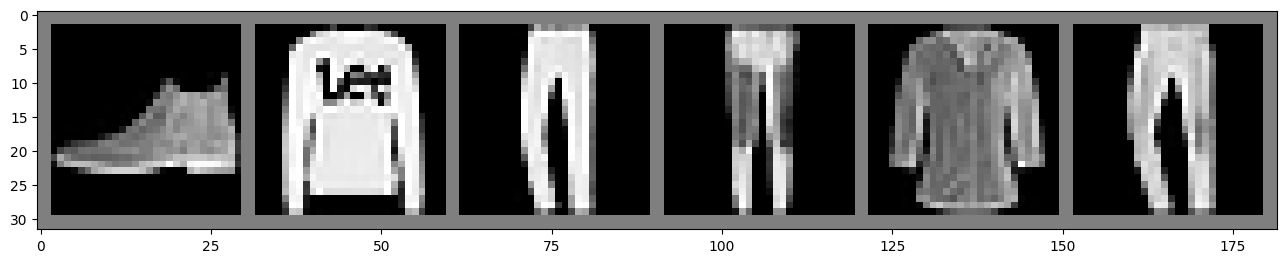

In [142]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter) # 1-batch = 128-images

imshow(torchvision.utils.make_grid(images[:6]))

y 예측하기

In [143]:
outputs = net(images) # input이 128x1x28x28 사이즈라 딱 맞다.

images.shape, outputs.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128, 10]))

In [144]:
_, predicted = torch.max(outputs, axis=1) # 각 데이터별로 10개의 class 중에 최대확률값을 가진 label을 최종 예측값으로 선택
print(predicted) # 앞에 있는 데이터(값)는 제거하고, max값(index)만 저장

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8, 1, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 4, 7, 2, 1,
        2, 6, 2, 6, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0,
        2, 3, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 3, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


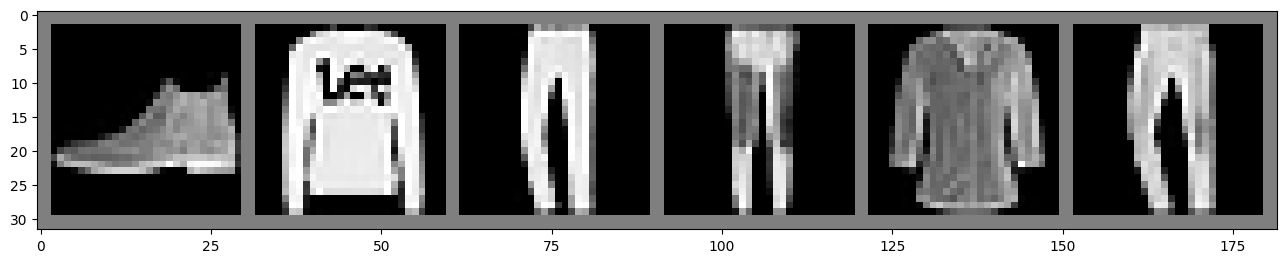

Ankle Boot. Pullover. Trouser. Trouser. Shirt. Trouser. 


In [145]:
imshow(torchvision.utils.make_grid(images[:6]))

print(''.join('{}. '.format(labels_map[int(predicted[j].to('cpu').numpy())]) for j in range(6)))

X,y 그리기

In [169]:
def imshow(preds):

    import numpy as np
    import matplotlib.pyplot as plt

    (images, labels) = preds

    fig = plt.figure(figsize=(10, 10))
    n = len(images)
    for i in range(1, n+1):

        image = images[i-1] / 2 + 0.5
        npimg = image.numpy()
        label = labels_map[int(labels[i-1].to('cpu').numpy())]

        fig.add_subplot(1, n+1, i)
        plt.title(label)
        plt.axis('off')
        plt.imshow(np.transpose(npimg, (1,2,0)), cmap='gray')

    plt.show()

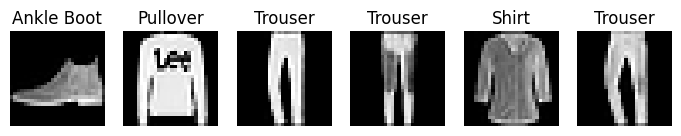

In [170]:
n=6
preds = (images[:n],predicted[:n])
imshow(preds)

평가지표

In [181]:
# 전체 test 데이터에 대해서 성능 확인

correct = 0
total = 0

with torch.no_grad(): # grad가 필요없다.
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'among total {total} photos : {100 * correct / total}%')

among total 10000 photos : 84.75%


In [182]:
total_batch = len(test_loader) # 79개의 batch
# 각 batch당 128개이고 마지막 batch는 128개가 안된다.

total_batch * 128

10112